In [4]:
import pandas
url = 'https://raw.githubusercontent.com/Coaxecva/Data-Science-Analytics-in-Python-Workshop-UoM-CS-Dept/master/data/iris.csv'
df = pandas.read_csv(url)
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
first_row = df.iloc[0]

In [6]:
first_row

SepalLength       5.1
SepalWidth        3.5
PetalLength       1.4
PetalWidth        0.2
Species        setosa
Name: 0, dtype: object

In [7]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [8]:
df.SepalLength.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLength, dtype: float64

In [9]:
a = df.SepalLength>5.84
a.head()

0    False
1    False
2    False
3    False
4    False
Name: SepalLength, dtype: bool

In [10]:
b = [False]*150
b[0] = b[2] = True
df3 = df[b]
df3

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [11]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
b = df[(df.SepalLength > df.SepalLength.mean()) & (df.Species == 'virginica')]
df.SepalLength.mean()

5.843333333333335

In [13]:
b.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
100,6.3,3.3,6.0,2.5,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica


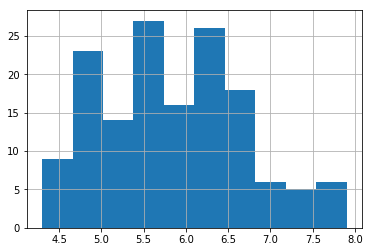

In [14]:
from matplotlib import pyplot
df.SepalLength.hist()

In [15]:
# Compute the average sepal lengths, petal lengths, etc. of data in each species
df4 = df.groupby('Species').mean()
df4

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [16]:
df4.iloc[0]

SepalLength    5.006
SepalWidth     3.428
PetalLength    1.462
PetalWidth     0.246
Name: setosa, dtype: float64

In [17]:
df4.loc['setosa']

SepalLength    5.006
SepalWidth     3.428
PetalLength    1.462
PetalWidth     0.246
Name: setosa, dtype: float64

In [18]:
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
#X = df[['SepalLength','SepalWidth']]
X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
model = KMeans(n_clusters=3)
model.fit(X)
print(adjusted_rand_score(model.labels_, df.Species))
print(silhouette_score(X, model.labels_))

0.7302382722834697
0.5528190123564101


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
X2 = pca.fit_transform(features)
model.fit(X2)
print(adjusted_rand_score(model.labels_, df.Species))

0.7163421126838475


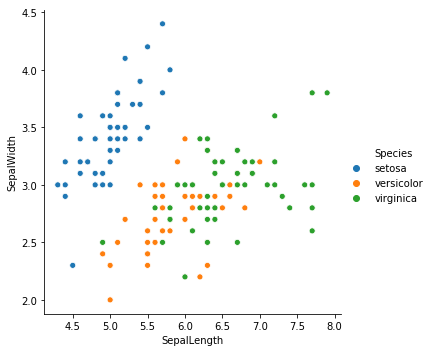

In [21]:
import seaborn
seaborn.relplot(x='SepalLength', y='SepalWidth', hue='Species', data=df)

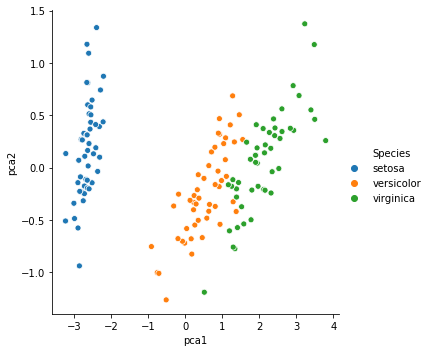

In [23]:
df['pca1'] = X2[:,0]
df['pca2'] = X2[:,1]
seaborn.relplot(x='pca1', y='pca2', hue='Species', data=df)